# Paleta de Cores

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

# Bibliotecas

In [2]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import transforms

# Conhecendo os dados

In [3]:
# Importando relatório de vendas
vendas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/refs/heads/master/dados/relatorio_vendas.csv')

# Transformação das colunas com data para tipo datetime
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')

vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-09,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-09,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-13,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-12,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-12,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-09-30,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-18,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-18,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-22,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [4]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

**Dicionário dos dados:**

`data_pedido`: data em que o cliente realizou o pedido do produto.

`data_envio`: data em que o produto foi enviado ao cliente.

`modo_envio`: modo de envio do produto especificado pelo cliente.

`nome_cliente`: nome do cliente.

`segmento_cliente`: o segmento a que pertence o cliente, podendo ser B2B ou B2C.

`cidade`: cidade de destino do pedido.

`estado`: estado de destino do pedido.

`regiao`: região de destino do pedido.

`departamento`: departamento do produto encomendado.

`tipo_produto`: categoria do produto encomendado.

`preco_base`: preço base de uma unidade do produto

`preco_unit_sem_desc`: preço unitário de venda do produto sem desconto

`desconto`: desconto fornecido na compra.

`preco_unit_venda`: preço unitário de venda do produto com desconto

`quantidade`: quantidade do produto requisitada.

`vendas`: valor da venda das unidades requisitadas do produto.

`lucro`: valor do lucro/prejuízo da empresa considerando o preço base do produto.

# Dados vendas por ano

Tratamento dos dados por ano

In [5]:
# Criação DF com os dados desejados (Ano)
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[['data_pedido', 'vendas']]

# Geração de nova coluna que represente apenas os anos dos dados
df_vendas_ano['ano'] = df_vendas_ano.data_pedido.dt.year
df_vendas_ano.drop(['data_pedido'], axis=1, inplace=True)

# Agrupamento das vendas por ano
df_vendas_ano = df_vendas_ano.groupby('ano')[['vendas']].sum()

df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


Visualização dos dados por ano

/tmp/ipython-input-647660105.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_vendas_ano,
/tmp/ipython-input-647660105.py:6: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_vendas_ano,


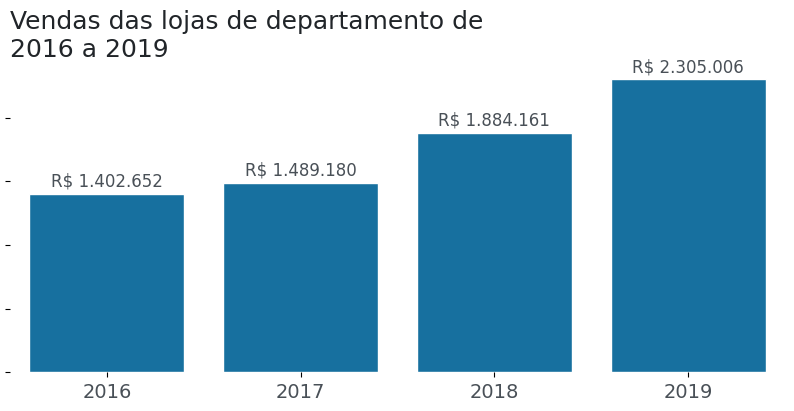

In [6]:
# Gerando função para criar gráfico de colunas
def grafico_vendas(cores: list=[AZUL2]):
    fig, ax = plt.subplots(figsize=(10,4))
    sns.set_theme(style='white')

    ax = sns.barplot(data=df_vendas_ano,
                     x=df_vendas_ano.index,
                     y='vendas',
                     palette=cores)

    ax.set_title('Vendas das lojas de departamento de\n2016 a 2019',
                loc='left',
                fontsize=18,
                color=CINZA1)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    sns.despine(bottom=True, left=True)

    ax.set_yticklabels([])
    for i, valor in enumerate(df_vendas_ano['vendas']):
        qtd = f'R$ {valor:,.0f}'.replace(',','.')
        offset = 1e5
        ax.text(i, valor + offset, qtd, color=CINZA2, fontsize=12,
                ha='center', va='center')

    return ax

ax = grafico_vendas()

Destacando resultados na visualização

/tmp/ipython-input-647660105.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_vendas_ano,


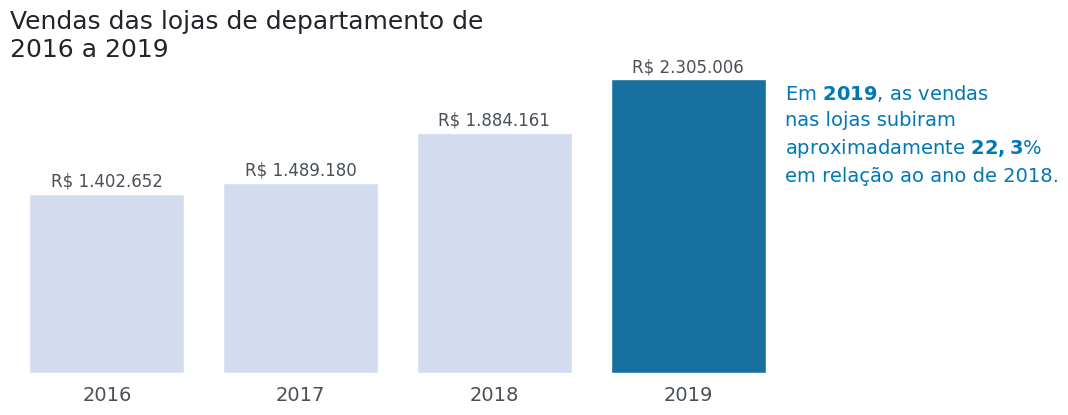

In [7]:
# Definindo cores do gráfico
cores = []
for ano in df_vendas_ano.index:
    if df_vendas_ano.loc[ano, 'vendas'] == df_vendas_ano.vendas.max():
        cores.append(AZUL2)
    else:
        cores.append(AZUL5)

# Chamando função do gráfico de colunas
ax = grafico_vendas(cores)

# Anotando conclusão no gráfico
ax.text(3.5, 1.5e6,
        'Em $\\bf{2019}$, as vendas\n'
        'nas lojas subiram\n'
        'aproximadamente $\\bf{22,3}$%\n'
        'em relação ao ano de 2018.',
        fontsize=14,
        linespacing=1.45,
        color=AZUL2)

fig = ax.get_figure()

# Dados referentes aos lucros dos produtos

Tratamento dos dados para visualização

In [8]:
# Criação de DF com os dados desejados
top_lucro = vendas.copy()
top_lucro = top_lucro[['tipo_produto', 'lucro']]

# Agrupamento dos dados tipo_produto e ordenação
top_lucro = top_lucro.groupby('tipo_produto')[['lucro']].sum().sort_values('lucro', ascending=False)

top_7 = top_lucro.head(7)
top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


Visualização dos dados

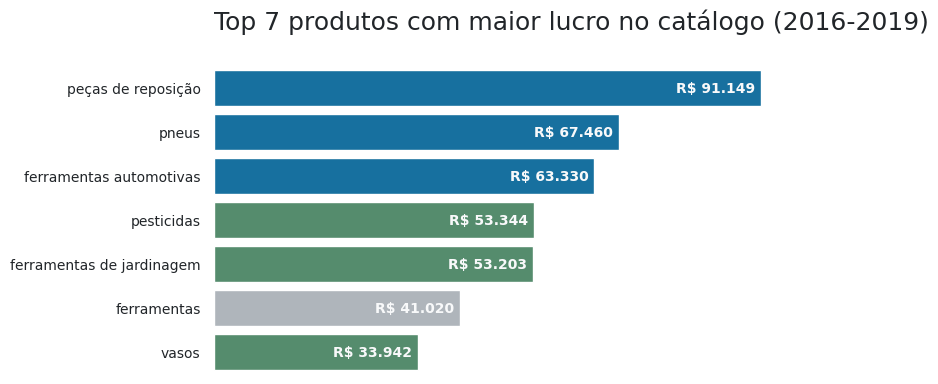

In [9]:
# Gerando função para criar gráfico de barras
def grafico_top_7():
    fig, ax = plt.subplots(figsize=(10,4))
    fig.subplots_adjust(right=0.7)
    sns.set_theme(style='white')

    cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

    ax = sns.barplot(data=top_7, x='lucro', y=top_7.index,
                     hue=top_7.index,
                     legend=False,
                     palette=cores)
    ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n',
                 fontsize=18,
                 color=CINZA1,
                 loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.yaxis.set_tick_params(labelsize=10,
                             labelcolor=CINZA1)
    sns.despine(left=True, bottom=True)

    for i, valor in enumerate(top_7['lucro']):
        qtd = f'R$ {valor:,.0f}'.replace(',','.')
        offset = 1e3
        ax.text(valor - offset, i, qtd, color=CINZA5,
                fontsize=10,
                fontweight='bold',
                ha='right',
                va='center')
    return ax

ax = grafico_top_7()

In [10]:
# Função para personalização do texto
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

Visualização dos dados com anotação

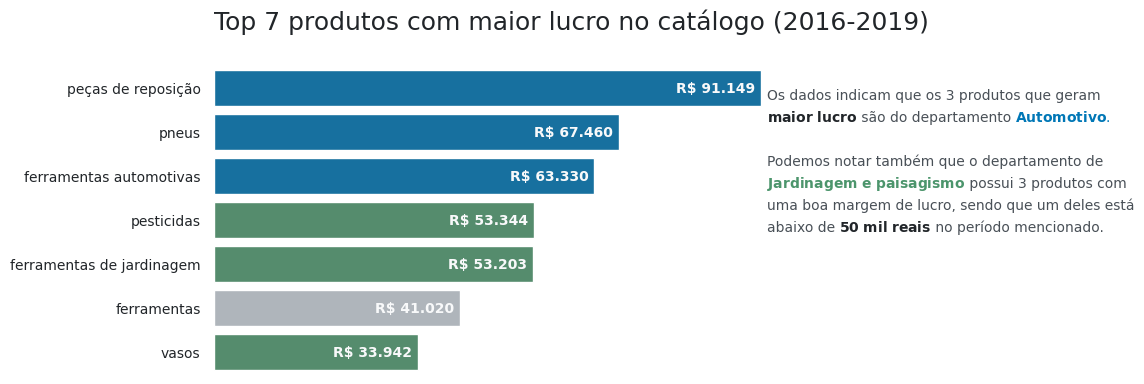

In [11]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(9.2e4, 3.25,
    'Os dados indicam que os 3 produtos que geram\n'
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],
     [CINZA1, CINZA2, AZUL2],
     [CINZA2],
     [CINZA2],
     [VERDE1, CINZA2],
     [CINZA2],
     [CINZA2, CINZA1, CINZA2]
    ],
    esp=22,
    ax=ax,
    fontsize=10)

fig = ax.get_figure()

# Análises propostas

Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

In [12]:
# Tratamento e agrupamento dos dados para visualização
lucro_ano = vendas.copy()

lucro_ano['ano'] = lucro_ano.data_pedido.dt.year
lucro_ano = lucro_ano[['ano', 'lucro']]
lucro_ano = lucro_ano.groupby('ano')[['lucro']].sum()
lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


In [13]:
# Função para criação de gráfico de colunas com suas personalizações
def grafico_coluna_lucro_ano():
    fig, ax = plt.subplots(figsize=(10,4))
    sns.set_theme(style='white')

    cores = []

    # Laço for percorre cada coluna, para alterar a cor de acordo com valor
    # A coluna com maior 'lucro' terá cor diferente
    for i in lucro_ano.index:
        if lucro_ano.loc[i, 'lucro'] == lucro_ano.lucro.max():
            cores.append(AZUL1)
        else:
            cores.append(AZUL4)

    ax = sns.barplot(data=lucro_ano,
                x=lucro_ano.index,
                y='lucro',
                hue=lucro_ano.index,
                legend=False,
                palette=cores)

    ax.set_title('Lucro de vendas por ano da loja de departamentos de\n2016 a 2019',
                fontsize=20,
                loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize=14,
                             labelcolor=CINZA1)
    sns.despine(bottom=True, left=True)

    ax.set_yticklabels([])

    # Laço for percorre cada coluna, para exibir o valor de cada uma
    for i, valor in enumerate(lucro_ano['lucro']):
        qtd = f'R$ {valor:,.0f}'.replace(',','.')
        offset = max(lucro_ano['lucro']) * 0.02
        ax.text(i, valor + offset, qtd, color=CINZA1,
                fontsize=12,
                ha='center',
                va='bottom')

    ax.text(3.5, 100000,
            'O ano de $\\bf{2019}$ foi o que obteve\n'
            'maior lucro, aproximadamente $\\bf{14,04}$% \n'
            'em relação ao ano de 2018.',
            fontsize=14,
            linespacing=1.45,
            color=AZUL1)

    return ax

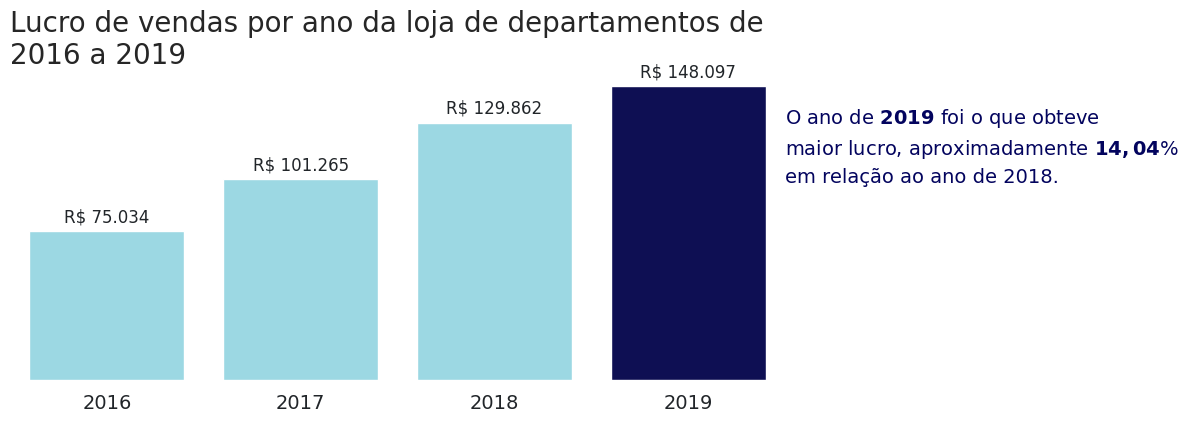

In [14]:
ax = grafico_coluna_lucro_ano()

Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione uma anotação referente aos dados.

In [15]:
vendas.departamento.unique()

array(['Materiais de construção', 'Jardinagem e paisagismo', 'Automotivo'],
      dtype=object)

In [16]:
vendas_produtos = vendas.copy()
vendas_protudos = vendas_produtos[['tipo_produto', 'vendas']]

vendas_produtos = vendas_produtos.groupby('tipo_produto')[['vendas']].sum().sort_values('vendas', ascending=False)
top_10_vendas = vendas_produtos.head(10)
top_10_vendas

,vendas
tipo_produto,
pneus,1022428.97
ferramentas,995158.41
vasos,696044.18
ferramentas de jardinagem,648879.72
materiais de revestimento,629656.36
equipamentos de limpeza,542304.58
ferramentas automotivas,502109.29
peças de reposição,486907.94
encanamentos,373223.88


In [17]:
# Função para criação de gráfico de colunas com suas personalizações
def grafico_top_10_vendas():
    fig, ax = plt.subplots(figsize=(10,4))
    fig.subplots_adjust(right=0.7)
    sns.set_theme(style='white')

    # Defini as cores das barras no gráfico
    cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)]

    ax = sns.barplot(data=top_10_vendas, x='vendas', y=top_10_vendas.index,
                     hue=top_10_vendas.index,
                     legend=False,
                     palette=cores)
    ax.set_title('Top 10 produtos com maior faturamento entre os anos de 2016-2019\n',
                 fontsize=18,
                 color=CINZA1,
                 loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.yaxis.set_tick_params(labelsize=10,
                             labelcolor=CINZA1)
    sns.despine(left=True, bottom=True)

    for i, valor in enumerate(top_10_vendas['vendas']):
        qtd = f'R$ {valor:,.0f}'.replace(',','.')
        offset = max(top_10_vendas['vendas']) * 0.02
        ax.text(valor - offset, i, qtd, color=CINZA5,
                fontsize=10,
                fontweight='bold',
                ha='right',
                va='center')

    # Utiliza função para gerar estilização de texto no gráfico
    texto_colorido(1.05e6, 4,
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n'
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],
     [CINZA2, AZUL2],
     [CINZA2],
     [CINZA2],
     [CINZA2],
     [CINZA2]
    ],
    esp=22,
    ax=ax,
    fontsize=10)

    return ax

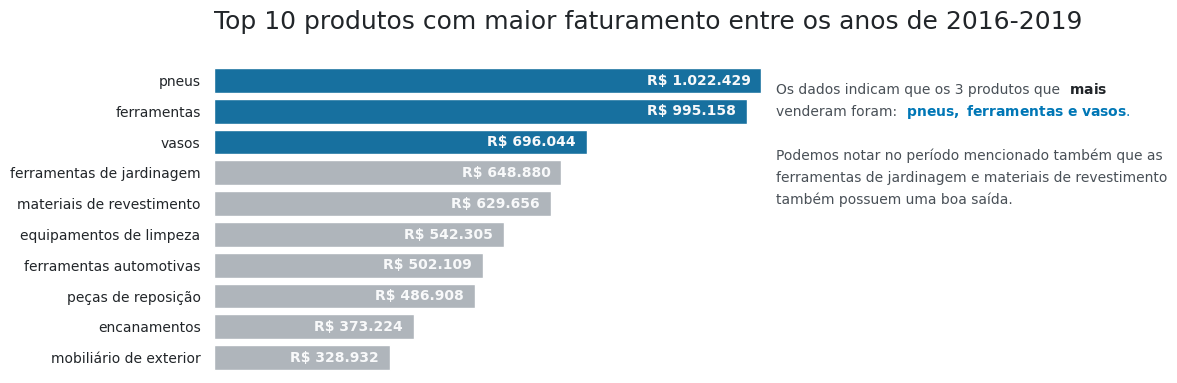

In [18]:
ax = grafico_top_10_vendas()

# Dados vendas por ano / Região

In [19]:
# Criando DF com os dados desejados
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg[['data_pedido', 'regiao', 'vendas']]

df_vendas_reg['ano'] = df_vendas_reg.data_pedido.dt.year
df_vendas_reg.drop(['data_pedido'], axis=1, inplace=True)

# DF com as variáveis 'regiado', 'vendas' e 'ano'
df_vendas_reg

,regiao,vendas,ano
0,Sudeste,890.66,2018
1,Sudeste,2488.59,2018
2,Sudeste,49.72,2018
3,Sul,3255.75,2017
4,Sul,76.04,2017
...,...,...,...
8935,Sudeste,123.22,2018
8936,Nordeste,271.97,2019
8937,Nordeste,700.75,2019
8938,Nordeste,85.83,2016


In [20]:
# Agrupando para visualizar as regiões com mais vendas
df_vendas_reg_grouped = df_vendas_reg.groupby(['ano','regiao'])[['vendas']].sum().sort_values(['ano','vendas'], ascending=[True,False])
df_vendas_reg_grouped

vendas
ano  regiao                  
2016 Sudeste        739602.18
     Nordeste       378521.83
     Centro-Oeste   121653.63
     Norte          101580.57
     Sul             61294.12
2017 Sudeste        803005.61
     Nordeste       320804.28
     Centro-Oeste   149215.00
     Norte          124164.47
     Sul             91990.16
2018 Sudeste       1033836.21
     Nordeste       401365.77
     Centro-Oeste   208068.71
     Sul            132180.63
     Norte          108710.09
2019 Sudeste       1146764.08
     Nordeste       600738.87
     Centro-Oeste   257781.18
     Norte          170311.34
     Sul            129410.82

In [21]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por região
vendas_reg = pd.crosstab(index=df_vendas_reg.ano, columns=df_vendas_reg.regiao,
                         values=df_vendas_reg.vendas, aggfunc='sum')

# Ajuste em ordem descrescente os estados com mais vendas
vendas_reg = vendas_reg[['Sudeste', 'Nordeste', 'Centro-Oeste', 'Norte', 'Sul']]
vendas_reg

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
ano,,,,,
2016,739602.18,378521.83,121653.63,101580.57,61294.12
2017,803005.61,320804.28,149215.00,124164.47,91990.16
2018,1033836.21,401365.77,208068.71,108710.09,132180.63
2019,1146764.08,600738.87,257781.18,170311.34,129410.82


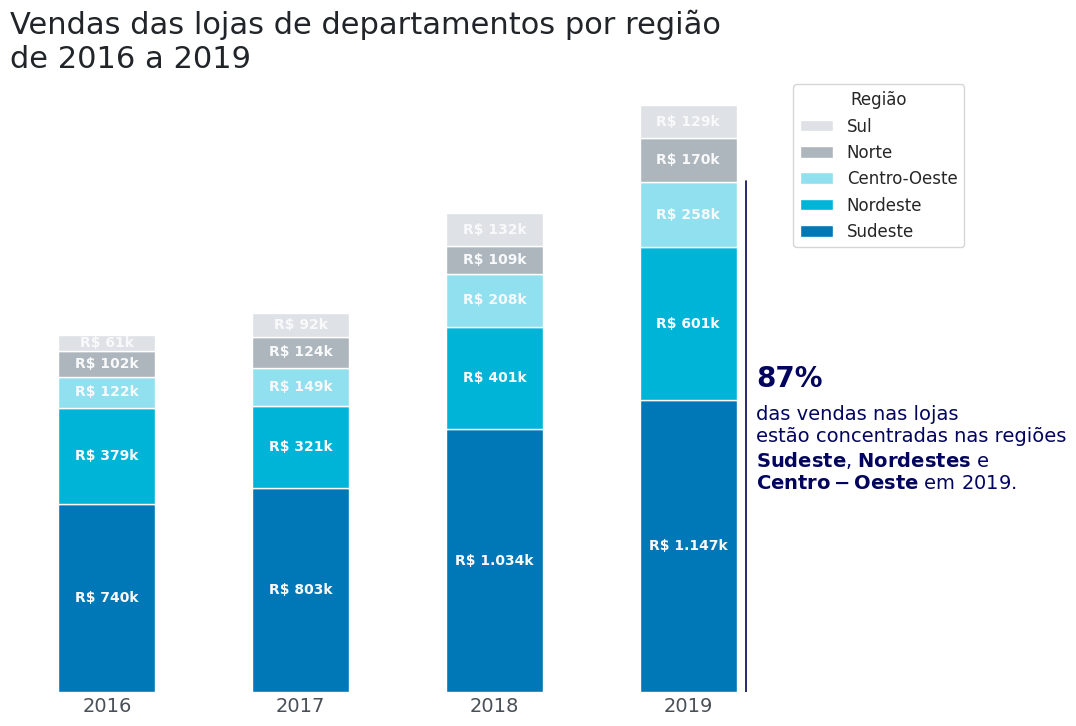

In [22]:
## Gerando função para criar o gráfico de barras

def grafico_vendas_regiao():

    cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

    ax = vendas_reg.plot(kind='bar', stacked=True, figsize=(10,8), color=cores)

    ax.set_title('Vendas das lojas de departamentos por região\nde 2016 a 2019',
                 loc='left',
                 fontsize=22,
                 color=CINZA1)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)
    ax.set_frame_on(False)

    ax.tick_params(axis='both', which='both', length=0)

    ax.text(3.35, 1.2e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
    ax.text(3.35, 8e5,
            'das vendas nas lojas\n'
            'estão concentradas nas regiões\n'
            '$\\bf{Sudeste}$, $\\bf{Nordestes}$ e\n'
            '$\\bf{Centro-Oeste}$ em 2019.',
            fontsize=14,
            color=AZUL1)

    ax.legend(bbox_to_anchor=(1,1), reverse=True,
              title='Região',
              title_fontsize=12,
              fontsize=12)

    for container in ax.containers:
        labels=[f'R$ {valor.get_height()/1000:,.0f}k'.replace(',','.') for valor in container]
        ax.bar_label(container,
                     label_type='center',
                     labels=labels,
                     size=10,
                     color=CINZA5,
                     fontweight='bold')

    ax.axvline(x=3.3, ymin=0, ymax=0.83, color=AZUL1, linewidth=1.2)

    return ax

ax = grafico_vendas_regiao()

# Dados por modo de envio

In [23]:
# Criando DF com os dados desejados
df_envio = vendas.copy()
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

# Criando tabela cruzada (crosstab) com os modos de envio pelos clientes
df_envio_seg = pd.crosstab(index=df_envio.modo_envio, columns=df_envio.segmento_cliente).sort_values('B2B')
df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Envio rápido,676,673
Econômica,829,906
Entrega padrão,2552,2809


In [24]:
# Criando tabela cruzada (crosstab) com os modos de envio pelos clientes normalizado
df_envio_normalizado = pd.crosstab(index=df_envio.modo_envio, columns=df_envio.segmento_cliente, normalize='index')
df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,0.418182,0.581818
Econômica,0.477810,0.522190
Entrega padrão,0.476031,0.523969
Envio rápido,0.501112,0.498888


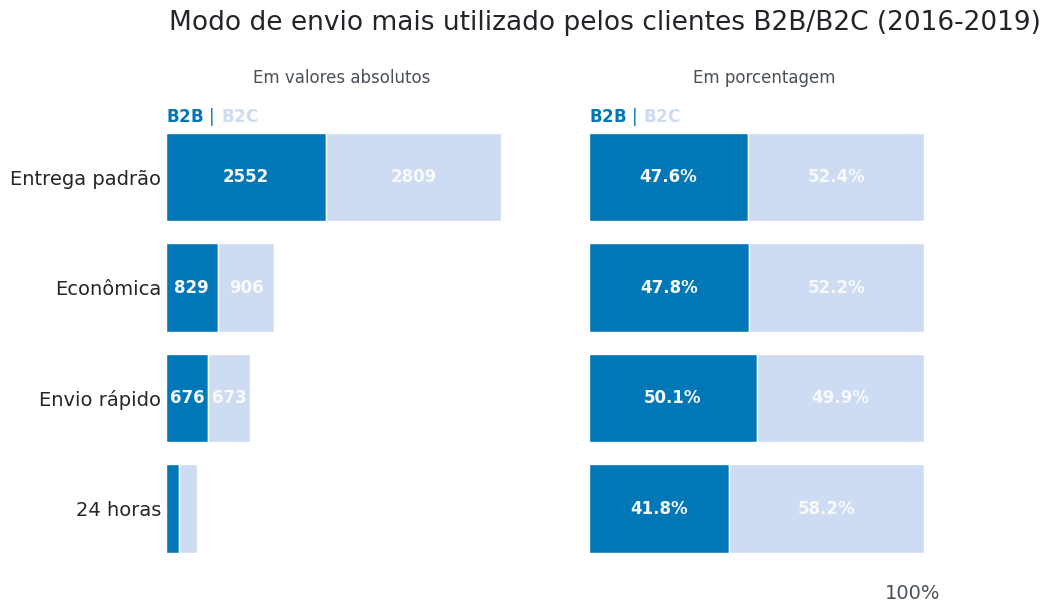

In [25]:
## Gerando gráficos e suas personalizações
fig, axs = plt.subplots(1,2, figsize=(10,6), sharey=True)

cores = [AZUL2, AZUL5]

# GRAFICO 1 - Barras empilhadas
axs[0].barh(df_envio_seg.index, df_envio_seg['B2B'], color=cores[0])
axs[0].barh(df_envio_seg.index, df_envio_seg['B2C'], left=df_envio_seg['B2B'], color=cores[1])

axs[0].set_title('Em valores absolutos\n', color=CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color=CINZA2)
axs[0].set_frame_on(False)
axs[0].tick_params(axis='both', which='both', length=0)

# Função com personalização para legenda
texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores=[cores], ax=axs[0], fontsize=12)

# GRAFICO 2 - Barras empilhadas - 100%
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado['B2B'], color=cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado['B2C'], left=df_envio_normalizado['B2B'], color=cores[1])

axs[1].set_title('Em porcentagem\n', color=CINZA2)
axs[1].set_xlabel('100%', color=CINZA2, size=14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)
axs[1].tick_params(axis='both', which='both', length=0)

# Função com personalização para legenda
texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores=[cores], ax=axs[1], fontsize=12)

# Título dos gráficos
fig.suptitle('Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n',
             fontsize=19,
             color=CINZA1,
             ha='right',
             x=1,
             y=1.05)

# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels=labels,
                     size=12,
                     color=CINZA5,
                     fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels=labels,
                     size=12,
                     color=CINZA5,
                     fontweight='bold')

fig.show()

# Análises propostas

Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

In [26]:
# Criando DF e tratando os dados de acordo com a análise proposta
vendas_centro = vendas.query('regiao == "Centro-Oeste"').copy()
vendas_centro = vendas_centro[['estado', 'vendas', 'data_pedido']]

vendas_centro['ano'] = vendas_centro.data_pedido.dt.year
vendas_centro.drop(['data_pedido'], axis=1, inplace=True)

vendas_centro = vendas_centro.query('ano == 2017 | ano == 2018')

vendas_centro = pd.crosstab(index=vendas_centro.ano, columns=vendas_centro.estado,
                            values=vendas_centro.vendas, aggfunc='sum')

vendas_centro = vendas_centro[['Distrito Federal', 'Goiás', 'Mato Grosso do Sul', 'Mato Grosso']]
vendas_centro

estado,Distrito Federal,Goiás,Mato Grosso do Sul,Mato Grosso
ano,,,,
2017,64308.70,66078.33,13568.51,5259.46
2018,103036.69,79801.93,14250.02,10980.07


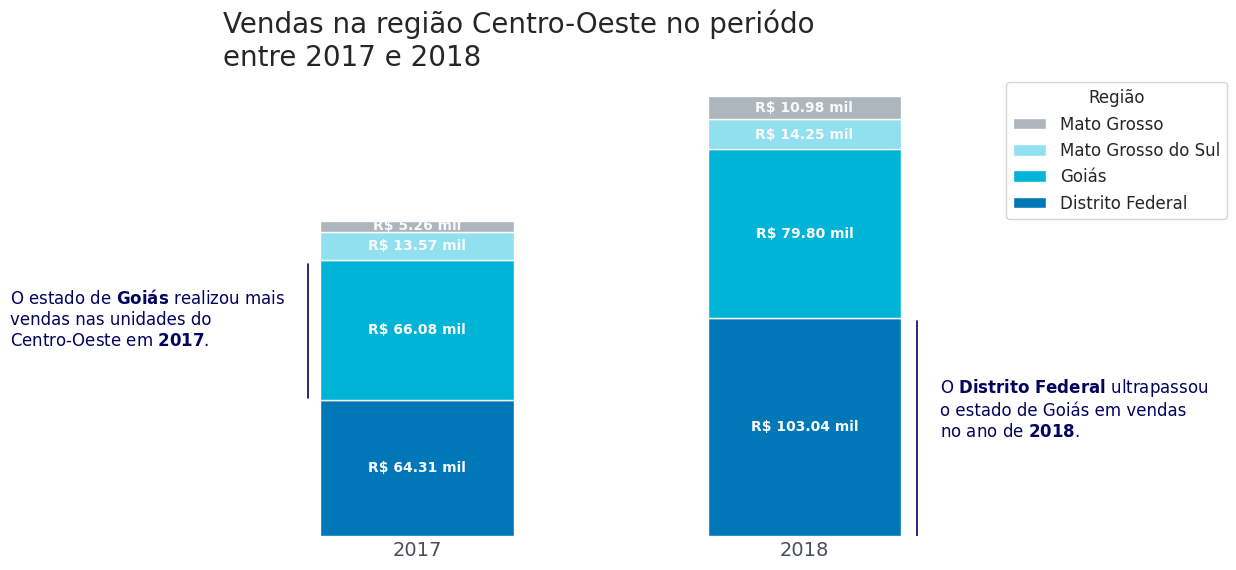

In [27]:
# Gerando função com suas personalizações para gráfico de colunas
def grafico_vendas_centro_oeste():

    cores = [AZUL2, AZUL3, AZUL4, CINZA3]

    ax = vendas_centro.plot(kind='bar', stacked=True, figsize=(10,6), color=cores)
    ax.set_title('Vendas na região Centro-Oeste no periódo\nentre 2017 e 2018',
                 fontsize=20,
                 loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)
    ax.set_frame_on(False)

    ax.tick_params(axis="both", which ="both", length=0)

    ax.legend(bbox_to_anchor=(1,1), reverse=True,
              title='Região',
              title_fontsize=12,
              fontsize=12)

    ax.text(-1.05, 9e4,
            'O estado de $\\bf{Goiás}$ realizou mais\n'
            'vendas nas unidades do\nCentro-Oeste em $\\bf{2017}$.',
            fontsize=12,
            linespacing=1.2,
            color=AZUL1)
    ax.text(1.35, 4.7e4,
            'O $\\bf{Distrito}$ $\\bf{Federal}$ ultrapassou\n'
            'o estado de Goiás em vendas\nno ano de $\\bf{2018}$.',
            fontsize=12,
            linespacing=1.2,
            color=AZUL1)

    for container in ax.containers:
        labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(',','.') for valor in container]
        ax.bar_label(container,
                     label_type='center',
                     labels=labels,
                     size=10,
                     color=CINZA5,
                     fontweight='bold')

    ax.axvline(x=-0.28, ymin=0.3, ymax=0.59, color=AZUL1, linewidth=1.2)
    ax.axvline(x=1.29, ymin=0, ymax=0.465, color=AZUL1, linewidth=1.2)

    return ax

ax = grafico_vendas_centro_oeste()

Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

In [28]:
# Criando DF e tratando os dados de acordo com a análise proposta
departamento_envio = vendas.copy()

departamento_envio = departamento_envio[['modo_envio', 'departamento']]
departamento_envio = pd.crosstab(index=departamento_envio.departamento,
                                 columns=departamento_envio.modo_envio,
                                 normalize='index')

departamento_envio

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


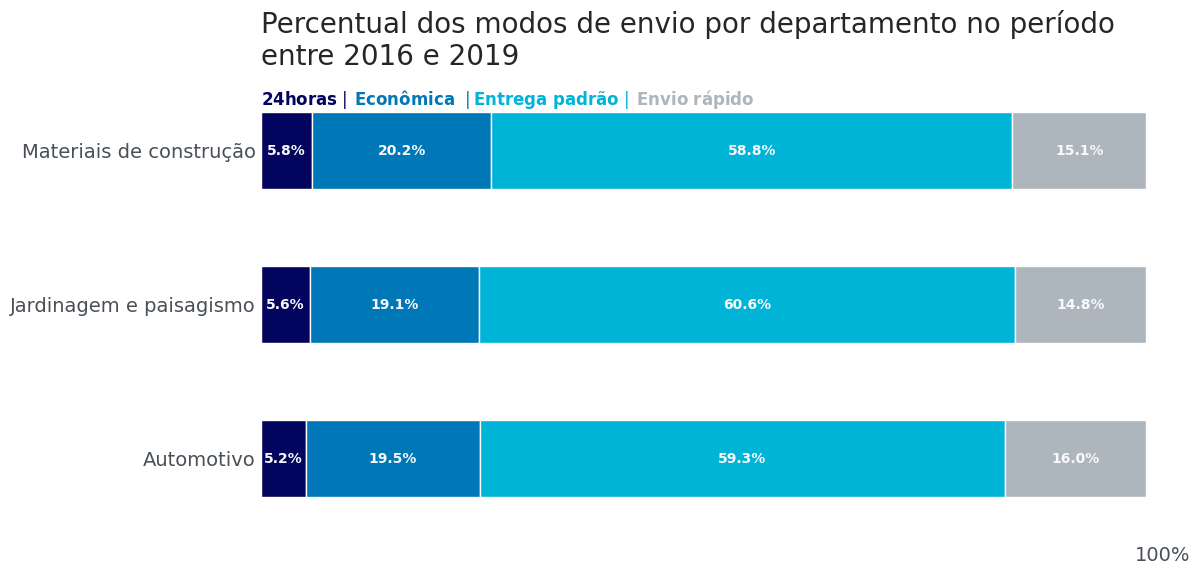

In [29]:
def grafico_departamento_envio():
    cores = [AZUL1, AZUL2, AZUL3, CINZA3]

    ax = departamento_envio.plot(kind='barh',
                                 stacked=True,
                                 figsize=(12,6),
                                 color=cores,
                                 legend=False)
    ax.set_title('Percentual dos modos de envio por departamento no período\nentre 2016 e 2019',
                 fontsize=20,
                 loc='left')
    ax.set_xlabel('100%', color=CINZA2, size=14, loc='right')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.yaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)
    ax.set_frame_on(False)

    ax.tick_params(axis="both", which ="both", length=0)

    for container in ax.containers:
        labels = [f'{valor.get_width()*100:,.1f}%'.replace(',','.') for valor in container]
        ax.bar_label(container,
                     label_type='center',
                     labels=labels,
                     size=10,
                     color=CINZA5,
                     fontweight='bold')

    texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | ||'
                   '$\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$',
                   cores = [cores],
                   ax=ax,
                   fontsize=12)

    return ax

ax = grafico_departamento_envio()

# Dados vendas por trimestre por estado específico

In [30]:
# Criando DF com os dados desejados
df_sp = vendas.copy()
df_sp = df_sp.query('estado == "São Paulo"')[['data_pedido', 'vendas']]

# Agrupamento das vendas por trimestre
df_sp.set_index('data_pedido', inplace=True)
df_sp = df_sp.resample('QE').agg('sum')

# Arredondando os valores para milhares
df_sp['vendas'] = round(df_sp['vendas'] / 1000, 2)
df_sp = df_sp.reset_index()

df_sp

,data_pedido,vendas
0,2016-03-31,41.87
1,2016-06-30,43.79
2,2016-09-30,154.91
3,2016-12-31,144.82
4,2017-03-31,36.13
5,2017-06-30,76.86
6,2017-09-30,129.76
7,2017-12-31,197.94
8,2018-03-31,44.26
9,2018-06-30,109.64


Gerando a visualização

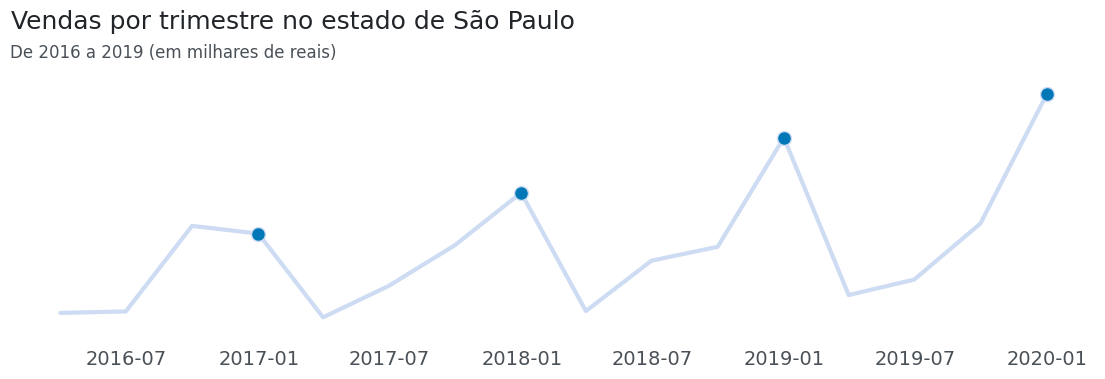

In [31]:
# Gerando função para o gráfico de linha
def grafico_vendas_sp_tri():
    fig, ax = plt.subplots(figsize=(14,4))

    # Lista com os pontos de interesse a serem destacados
    pontos_a_marcar = [True if mes == 12 else False for mes in df_sp['data_pedido'].dt.month]

    # Gráfico de linhas
    ax.plot(df_sp['data_pedido'], df_sp['vendas'], lw=3, color=AZUL5,
            marker='o',
            markersize=10,
            markerfacecolor=AZUL2,
            markevery=pontos_a_marcar)

    # Personalização do gráfico
    ax.set_title('Vendas por trimestre no estado de São Paulo',
                 fontsize=18,
                 color=CINZA1,
                 loc='left')
    ax.text(0.3, 0.95, 'De 2016 a 2019 (em milhares de reais)',
            transform=ax.transAxes,
            color=CINZA2,
            fontsize=12,
            ha='right',
            va='center')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.set_frame_on(False)
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

    ax.tick_params(axis='both', which='both', length=0)

    plt.ylim(0,400)

    return ax

ax = grafico_vendas_sp_tri()

Definindo intervalos de tempo

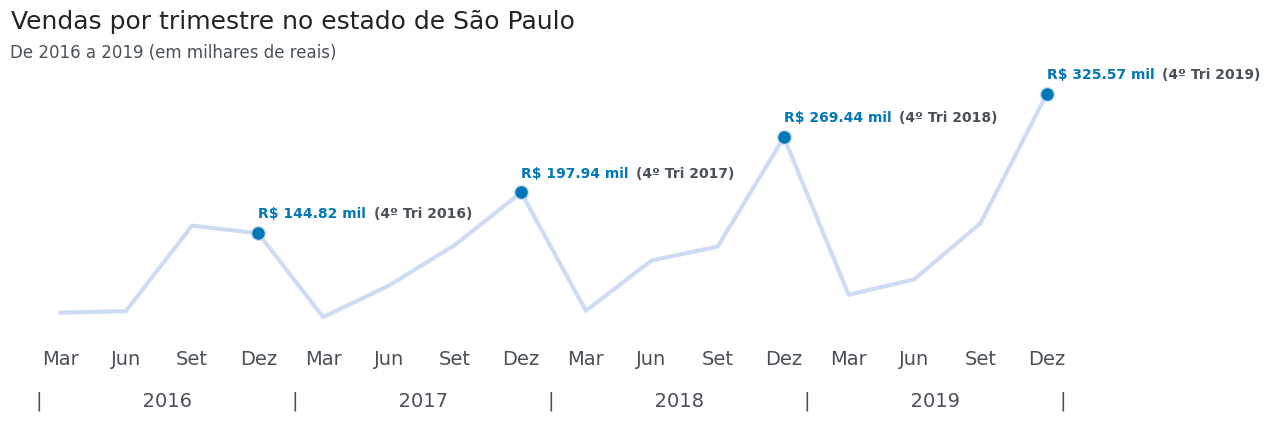

In [32]:
# Importando módulo dates, auxilia na formatação dos intervalos de tempo
import matplotlib.dates as mdates

ax = grafico_vendas_sp_tri()

# Personalização dos intervalos de tempo
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
x_labels = ['Mar', 'Jun', 'Set', 'Dez'] * 4
ax.set_xticks(df_sp.data_pedido)
ax.set_xticklabels(x_labels, ha='center')

texto = [16*' ' + str(i) + 16*' ' for i in range(2016,2020)]
ax.text(ax.get_xbound()[0] + 35, - 80, f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|',
        fontsize=14,
        color=CINZA2)

# Personalização das anotações com os valores dos pontos de interesse
ano = 0
for i in range(3, len(df_sp['vendas']), 4):
    ax.text(x = ax.get_xticks()[i], y = df_sp["vendas"][i] + 20,
            s = f"R$ {df_sp['vendas'][i]} mil", color = AZUL2, weight = "bold", fontsize = 10)
    ax.text(x = ax.get_xticks()[i] + 160, y = df_sp["vendas"][i] + 20,
            s = f"(4º Tri {2016 + ano})", color = CINZA2, weight = "bold", fontsize = 10)
    ano +=1

fig = ax.get_figure()

# Faturamento por trimestre de cada região

In [33]:
# Gerando DF e tratando os dados como desejado
df_regiao = vendas.copy()
df_regiao = df_regiao[['regiao', 'data_pedido', 'vendas']]

df_regiao = pd.crosstab(index=df_regiao.data_pedido, columns=df_regiao.regiao, values=df_regiao.vendas, aggfunc='sum')

df_regiao = df_regiao[['Sudeste', 'Nordeste', 'Centro-Oeste', 'Norte', 'Sul']]
df_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-01-04,55.92,NaN,NaN,NaN,NaN
2016-01-05,979.42,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,66.42,NaN,NaN
2016-01-07,14940.66,43.44,NaN,NaN,NaN
2016-01-08,296.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,2552.32,152.15,NaN,10.64
2019-12-28,603.96,NaN,NaN,NaN,NaN
2019-12-29,677.65,4079.73,NaN,456.94,NaN


In [34]:
# Utilizando da função resample para obter os dados trimestralmente
df_regiao = df_regiao.resample('QE').agg('sum')

# Arredondando os valores por mil
df_regiao = round(df_regiao/1000,2)
df_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-03-31,70.18,41.73,16.80,9.31,1.51
2016-06-30,122.72,87.41,30.83,24.68,10.62
2016-09-30,226.43,158.12,39.61,21.94,11.97
2016-12-31,320.27,91.27,34.41,45.65,37.19
2017-03-31,127.89,61.58,5.90,35.25,4.75
2017-06-30,161.54,54.93,16.96,13.35,21.23
2017-09-30,206.29,91.60,48.82,48.71,21.68
2017-12-31,307.28,112.69,77.54,26.86,44.34
2018-03-31,120.56,92.40,29.30,39.03,6.95


In [35]:
# Gerando um gráfico de linhas
fig = px.line(df_regiao, x=df_regiao.index, y=df_regiao.columns, markers=True,
              labels={'regiao': 'Região'},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1, VERDE1, CINZA3])

# Personalização do gráfico
fig.update_layout(width=1300, height=600,
                  font_family='Arial', font_size=15, font_color=CINZA2,
                  title_font_color=CINZA1, title_font_size=24,
                  title_text='Faturamento da loja de departamento por trimestre' +
                  '<br><sup size=1 style="color:#555655"> De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor=CINZA5)

fig.update_yaxes(tickprefix='R$ ', ticksuffix=' mil')

# Ajustando ticks do eixo X
labels = ['T1<br>2016', 'T1<br>2017', 'T1<br>2019', 'T1<br>2019',
          'T2<br>2016', 'T2<br>2017', 'T2<br>2019', 'T2<br>2019',
          'T1<br>2016', 'T2<br>2017', 'T3<br>2019', 'T3<br>2019',
          'T1<br>2016', 'T2<br>2017', 'T4<br>2019', 'T4<br>2019']
fig.update_xaxes(ticktext=labels, tickvals=df_regiao.index)

fig.show()

In [36]:
# Dados ao passar o mouse
fig.update_traces(mode='markers+lines', hovertemplate='<b>Período:</b> %{x} <br> <b>Faturamento:</b> %{y}')
fig.update_layout(hovermode="x")

fig.show()

# Análises propostas

Vendas por semestre no estado de Minas Gerais

In [37]:
# Criando DF e tratando os dados de acordo com a análise proposta
df_mg = vendas.copy()
df_mg = df_mg.query('estado == "Minas Gerais"')
df_mg = df_mg[['data_pedido', 'vendas']]

df_mg.set_index('data_pedido', inplace=True)
df_mg = df_mg.resample('2QE', closed='left').agg('sum')

df_mg = round(df_mg['vendas']/1000, 2)
df_mg = df_mg.reset_index()
df_mg

,data_pedido,vendas
0,2016-06-30,24.14
1,2016-12-31,89.75
2,2017-06-30,37.84
3,2017-12-31,60.39
4,2018-06-30,28.40
5,2018-12-31,82.33
6,2019-06-30,69.15
7,2019-12-31,97.31


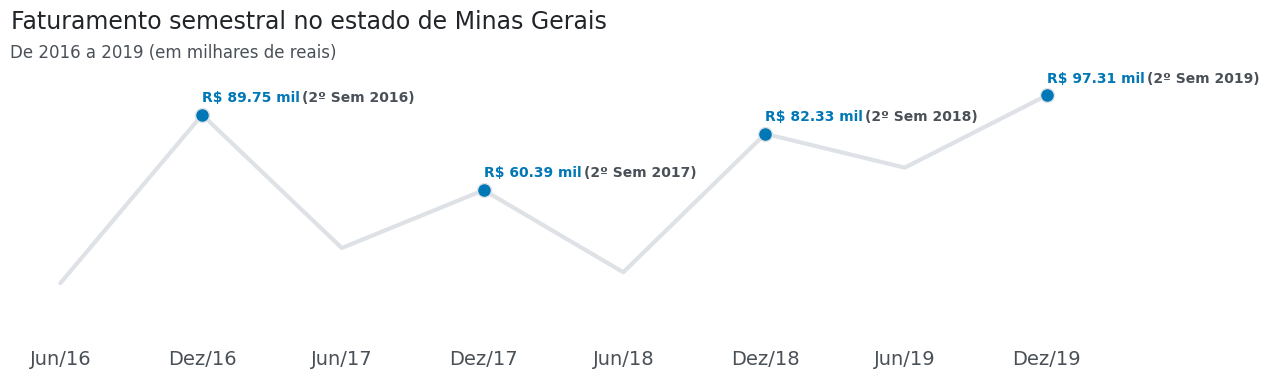

In [38]:
# Função para geração de gráfico de linha
def grafico_vendas_mg_sem():

    mark_points = [True if mes == 12 else False for mes in df_mg['data_pedido'].dt.month]

    fig, ax = plt.subplots(figsize=(14,4))

    ax.plot(df_mg['data_pedido'], df_mg['vendas'], lw=3, color=CINZA4,
            marker='o',
            markersize=10,
            markerfacecolor=AZUL2,
            markevery=mark_points)

    # Personalização do gráfico
    ax.set_title('Faturamento semestral no estado de Minas Gerais',
                 fontsize=17,
                 color=CINZA1,
                 loc='left')
    ax.text(0.3, 0.95, 'De 2016 a 2019 (em milhares de reais)',
            transform=ax.transAxes,
            color=CINZA2,
            fontsize=12,
            ha='right',
            va='center')

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.set_frame_on(False)
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

    ax.tick_params(axis='both', which='both', length=0)

    plt.ylim(0,120)

    # Personalização dos ticks do eixo X de acordo com a série temporal
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))
    x_labels = ['Jun/16', 'Dez/16', 'Jun/17', 'Dez/17',
                'Jun/18', 'Dez/18', 'Jun/19', 'Dez/19']
    ax.set_xticks(df_mg.data_pedido)
    ax.set_xticklabels(x_labels, ha='center')

    ano = 0
    for i in range(1, len(df_mg['vendas']), 2):
        ax.text(x = ax.get_xticks()[i], y = df_mg["vendas"][i] + 5, s = f'R$ {df_mg["vendas"][i]} mil', color = AZUL2, weight = 'bold', fontsize = 10)
        ax.text(x = ax.get_xticks()[i] + 130, y = df_mg["vendas"][i] + 5, s = f'(2º Sem {2016 + ano})', color = CINZA2, weight = 'bold', fontsize = 10)
        ano += 1

    return ax

ax = grafico_vendas_mg_sem()

 Comparação os lucros anuais da região Nordeste por meio de um gráfico de linhas.

In [39]:
# Criando DF e tratando os dados de acordo com a análise proposta
df_nordeste = vendas.copy()
df_nordeste = df_nordeste.query('regiao == "Nordeste"')
df_nordeste = df_nordeste[['data_pedido', 'lucro']]
df_nordeste['ano'] = df_nordeste.data_pedido.dt.year
df_nordeste['mes'] = df_nordeste.data_pedido.dt.month

df_nordeste = df_nordeste.groupby(['ano', 'mes'])[['lucro']].sum()
df_nordeste.reset_index(inplace=True)
df_nordeste['lucro'] = round(df_nordeste['lucro']/1000, 2)

In [40]:
# Geração de gráfico de linha
fig = px.line(df_nordeste, x=df_nordeste['mes'], y=df_nordeste['lucro'],
              color=df_nordeste['ano'],
              markers=True,
              labels={'ano': 'Ano'},
              color_discrete_sequence=[AZUL2, VERMELHO1, VERDE1, CINZA2])

# Personalização do gráfico
fig.update_layout(width=1300, height=600,
                  font_family='Arial', font_size=15, font_color=CINZA2,
                  title_font_color=CINZA1, title_font_size=24,
                  title_text='Lucro anual na região Nordeste' +
                  '<br><sup size=1 style="color:#555655"> De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor=CINZA5)

# Personalização dos ticks do eixo Y e X
fig.update_yaxes(tickprefix='R$ ', ticksuffix=' mil')
label=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
fig.update_xaxes(ticktext=label, tickvals=df_nordeste['mes'])

fig.update_traces(mode='markers+lines', hovertemplate='<b>Mês:</b> %{x} <br> <b>Lucro:</b> %{y}')
fig.update_layout(hovermode="closest")

fig.show()

 Comparação os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

In [41]:
# Criando DF e tratando os dados de acordo com a análise proposta
estados_nordeste = vendas.copy()
estados_nordeste = estados_nordeste.query('regiao == "Nordeste"')
estados_nordeste = estados_nordeste[['data_pedido', 'estado', 'lucro']]
estados_nordeste['ano'] = estados_nordeste.data_pedido.dt.year
estados_nordeste.drop(['data_pedido'], axis=1, inplace=True)
estados_nordeste

,estado,lucro,ano
13,Ceará,225.39,2018
17,Bahia,4.22,2016
18,Bahia,27.21,2016
19,Bahia,12.56,2016
20,Bahia,8.61,2018
...,...,...,...
8934,Rio Grande do Norte,27.40,2017
8936,Bahia,48.96,2019
8937,Bahia,94.60,2019
8938,Paraíba,6.96,2016


In [42]:
# Agrupando os dados por ano e estados
estados_nordeste = estados_nordeste.groupby(['ano', 'estado'])[['lucro']].sum()
estados_nordeste.reset_index(inplace=True)
estados_nordeste

,ano,estado,lucro
0,2016,Alagoas,1199.99
1,2016,Bahia,9983.07
2,2016,Ceará,10253.45
3,2016,Maranhão,1883.16
4,2016,Paraíba,-269.74
5,2016,Pernambuco,11727.76
6,2016,Piauí,18.48
7,2016,Rio Grande do Norte,274.66
8,2016,Sergipe,893.13
9,2017,Alagoas,3767.98


In [43]:
# Arredondando da coluna 'lucro' valores por mil
estados_nordeste['lucro'] = round(estados_nordeste['lucro']/1000, 2)

In [45]:
# Geração de gráfico de linha
fig = px.line(estados_nordeste, x=estados_nordeste['ano'], y=estados_nordeste['lucro'],
              color=estados_nordeste['estado'],
              markers=True,
              labels={'estado': 'Estados'})

# Personalização do gráfico
fig.update_layout(width=1300, height=600,
                  font_family='Arial', font_size=15, font_color=CINZA2,
                  title_font_color=CINZA1, title_font_size=24,
                  title_text='Lucro anual de cada estado na região Nordeste' +
                  '<br><sup size=1 style="color:#555655"> De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor=CINZA5)

# Personalização dos ticks do eixo Y e X
fig.update_yaxes(tickprefix='R$ ', ticksuffix=' mil')
fig.update_xaxes(tickvals=estados_nordeste['ano'])

fig.update_traces(mode='markers+lines', hovertemplate='<b>Ano:</b> %{x} <br> <b>Lucro:</b> %{y}')
fig.update_layout(hovermode="closest")

fig.show()